## LSI31008 Elements of Bioinformatics, Assignment:  Basic sequence statistics, the genetic code and transcription factor binding sites.

## Introduction to the assignment

Here we will explore the (near) universal genetic code discussed at the lecture. We first load in yeast *S.cerevisiae* coding sequence downloaded from [SGD](https://downloads.yeastgenome.org/sequence/S288C_reference/orf_dna/). The idea is to evaluate various statistics from the genomic data and think about them in the light of the genetic code. For background reading please have a look of ["JB Plotkin, G Kudla: Synonymous but not the same: the causes and consequences of codon bias"](https://www.nature.com/articles/nrg2899) and ["EV Koonin, AS Novozhilov: Origin and evolution of the genetic code: The universal enigma"](https://iubmb.onlinelibrary.wiley.com/doi/abs/10.1002/iub.146).

The Biopython package offers easy ways to read in FASTA-files and to handle sequences. To install it on the CSC Jupyter environment you need to run the following commands: (Note: you might need to run this separately and then restart this notebook to ensure that the package is available to your session)

In [80]:
import sys
!{sys.executable} -m pip install --user biopython

After Biopython installs, you need to restart the Jupyter kernel by selecting `Kernel -> Restart Kernel...` in the user interface at the top of the page (or clicking on the circular arrow button).

### Library imports

Import pyplot for figure generation:

In [81]:
from matplotlib import pyplot as plt

Import also Counter and OrderedDict, for subsequent usage:

In [82]:
from collections import Counter, OrderedDict

Import Biopython SeqIO for reading FASTA-files (if the import fails, restart the kernel as indicated in the previous section).

Please see the following links for information on using Biopython sequence tools:

https://biopython.org/wiki/SeqIO

https://biopython.org/wiki/SeqRecord

https://biopython.org/wiki/Seq

In [83]:
from Bio import SeqIO

### Data reading and primary exploration

The yeast coding sequence data we will be using in this exercise is provided in FASTA format that contains many short sequences, each identified by an ID and some supplementary information -- chromosome number, genomic position, etc.

We read in the sequence data file into a dictionary of SeqRecord objects:

In [84]:
input_file = 'data/orf_coding.fasta'
records = SeqIO.to_dict(SeqIO.parse(input_file, "fasta"))

See that we have 5917 keys (IDs):

In [85]:
ids = list(records.keys())
len(ids)

5917

A single record in the dictionary contains all kinds of data. Let's see what the data represented by the **first** ID contains:

In [86]:
records[ids[0]]

SeqRecord(seq=Seq('ATGGTACTGACGATTTATCCTGACGAACTCGTACAAATAGTGTCTGATAAAATT...TAA'), id='YAL001C', name='YAL001C', description='YAL001C TFC3 SGDID:S000000001, Chr I from 151006-147594,151166-151097, Genome Release 64-2-1, reverse complement, intron sequence removed, Verified ORF, "Subunit of RNA polymerase III transcription initiation factor complex; part of the TauB domain of TFIIIC that binds DNA at the BoxB promoter sites of tRNA and similar genes; cooperates with Tfc6p in DNA binding; largest of six subunits of the RNA polymerase III transcription initiation factor complex (TFIIIC)"', dbxrefs=[])

To get the nucleotide sequence out use `.seq`

In [87]:
sequence = (records[ids[0]]).seq
sequence

Seq('ATGGTACTGACGATTTATCCTGACGAACTCGTACAAATAGTGTCTGATAAAATT...TAA')

It may be more convenient to cast the variable type in to a string (str):

In [88]:
str(sequence)

'ATGGTACTGACGATTTATCCTGACGAACTCGTACAAATAGTGTCTGATAAAATTGCTTCAAATAAGGGAAAAATCACTTTGAATCAGCTGTGGGATATATCTGGTAAATATTTTGATTTGTCTGATAAAAAAGTTAAACAGTTCGTGCTTTCATGCGTGATATTGAAAAAGGACATTGAGGTGTATTGTGATGGTGCTATAACAACTAAAAATGTGACTGATATTATAGGCGACGCTAATCATTCATACTCGGTTGGGATTACTGAGGACAGCCTATGGACATTATTAACGGGATACACAAAAAAGGAGTCAACTATTGGAAATTCTGCATTTGAACTACTTCTCGAAGTTGCCAAATCAGGAGAAAAAGGGATCAATACTATGGATTTGGCGCAGGTAACTGGGCAAGATCCTAGAAGTGTGACTGGACGTATCAAGAAAATAAACCACCTGTTAACAAGTTCACAACTGATTTATAAGGGACACGTCGTGAAGCAATTGAAGCTAAAAAAATTCAGCCATGACGGGGTGGATAGTAATCCCTATATTAATATTAGGGATCATTTAGCAACAATAGTTGAGGTGGTAAAACGATCAAAAAATGGTATTCGCCAGATAATTGATTTAAAGCGTGAATTGAAATTTGACAAAGAGAAAAGACTTTCTAAAGCTTTTATTGCAGCTATTGCATGGTTAGATGAAAAGGAGTACTTAAAGAAAGTGCTTGTAGTATCACCCAAGAATCCTGCCATTAAAATCAGATGTGTAAAATACGTGAAAGATATTCCAGACTCTAAAGGCTCGCCTTCATTTGAGTATGATAGCAATAGCGCGGATGAAGATTCTGTATCAGATAGCAAGGCAGCTTTCGAAGATGAAGACTTAGTCGAAGGTTTAGATAATTTCAATGCGACTGATTTATTACAAAATCAAGGCCTTGTTATGGAAGAGAAAGAGGATGCTGTAAAGAATGAAGTTCTTCTTAATCGATTTTATCCA

Or `.translate()` for amino acid sequence:

In [89]:
str(sequence.translate())

'MVLTIYPDELVQIVSDKIASNKGKITLNQLWDISGKYFDLSDKKVKQFVLSCVILKKDIEVYCDGAITTKNVTDIIGDANHSYSVGITEDSLWTLLTGYTKKESTIGNSAFELLLEVAKSGEKGINTMDLAQVTGQDPRSVTGRIKKINHLLTSSQLIYKGHVVKQLKLKKFSHDGVDSNPYINIRDHLATIVEVVKRSKNGIRQIIDLKRELKFDKEKRLSKAFIAAIAWLDEKEYLKKVLVVSPKNPAIKIRCVKYVKDIPDSKGSPSFEYDSNSADEDSVSDSKAAFEDEDLVEGLDNFNATDLLQNQGLVMEEKEDAVKNEVLLNRFYPLQNQTYDIADKSGLKGISTMDVVNRITGKEFQRAFTKSSEYYLESVDKQKENTGGYRLFRIYDFEGKKKFFRLFTAQNFQKLTNAEDEISVPKGFDELGKSRTDLKTLNEDNFVALNNTVRFTTDSDGQDIFFWHGELKIPPNSKKTPNKNKRKRQVKNSTNASVAGNISNPKRIKLEQHVSTAQEPKSAEDSPSSNGGTVVKGKVVNFGGFSARSLRSLQRQRAILKVMNTIGGVAYLREQFYESVSKYMGSTTTLDKKTVRGDVDLMVESEKLGARTEPVSGRKIIFLPTVGEDAIQRYILKEKDSKKATFTDVIHDTEIYFFDQTEKNRFHRGKKSVERIRKFQNRQKNAKIKASDDAISKKSTSVNVSDGKIKRRDKKVSAGRTTVVVENTKEDKTVYHAGTKDGVQALIRAVVVTKSIKNEIMWDKITKLFPNNSLDNLKKKWTARRVRMGHSGWRAYVDKWKKMLVLAIKSEKISLRDVEELDLIKLLDIWTSFDEKEIKRPLFLYKNYEENRKKFTLVRDDTLTHSGNDLAMSSMIQREISSLKKTYTRKISASTKDLSKSQSDDYIRTVIRSILIESPSTTRNEIEALKNVGNESIDNVIMDMAKEKQIYLHGSKLECTDTLPDILENRGNYKDFGVAFQYRCKVNELLEAGNAIVIN

##  Problem 1a
Evaluate what is the fraction of nucleotides 'A', 'C', 'G' and 'T' in the coding sequence of *S.cer*. You can use the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) from the code below to get the number of occurrences of every nucleotide (remember to compute the fractions).

In [90]:
# Example with the first sequence in the sequence data
sequence = str(records[ids[0]].seq)
for nucleotide, count in Counter(sequence).items():
    print(nucleotide, ":", count)

A : 1238
T : 952
G : 744
C : 549


Alternatively, you can use the [OrderedDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict), together with the `.most_common()` method to sort the elements of a `Counter` object:

In [91]:
# By default, OrderedDict sorts a dictionary in a descending order.
OrderedDict(Counter(sequence).most_common())

OrderedDict([('A', 1238), ('T', 952), ('G', 744), ('C', 549)])

**Hint:** remember that each of the 5917 sequences in the data are part of the full coding sequence! It may be useful to combine the entire coding sequence into one long string.

In [92]:
whole_sequence = ''.join([str(records[ids[i]].seq) for i in range(len(records.keys()))])
for nuc, count in Counter(whole_sequence).items():
    print(nuc, ":", count)


A : 2883611
T : 2426618
G : 1795281
C : 1683047


##  Problem 1b
Translate the coding sequences to protein sequence. Make a barchart showing the numbers of each amino-acid and stop codon, order by prevalence.

**Hint:** Adapt the code in 1a, but for amino-acids instead of nucleotides, and then make the barchart.

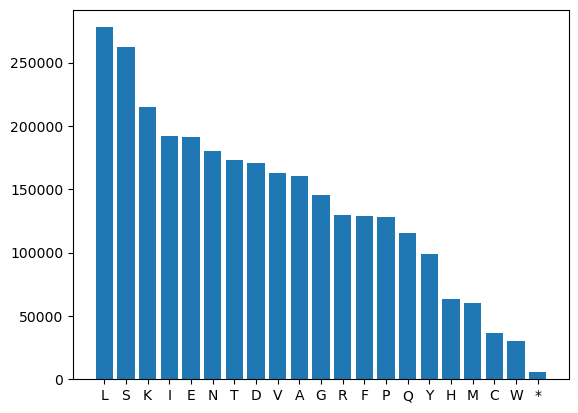

In [93]:
trans_sequence = ''.join([str(records[ids[i]].seq.translate()) for i in range(len(records.keys()))])

amino_count = list()
for nuc, count in Counter(trans_sequence).items():
    amino_count.append((nuc, count))
    
amino_count.sort(key=lambda x: x[1], reverse=True)
plt.bar([amino for (amino, count) in amino_count], [count for (amino, count) in amino_count])
plt.show()


##  Problem 1c
Pick out the most frequent amino acid from the figure you made in 1b and plot the frequencies of the corresponding nucleotide triplets (codons) in the full coding sequence. 

Use the `triplet_to_aminoacid` dictionary below or this [infographic](https://i0.wp.com/www.compoundchem.com/wp-content/uploads/2014/09/20-Common-Amino-Acids-v3.png?ssl=1) to determine which nucleotide triplets code for the selected amino acid.

**Hint:** Use the `extract_triplets` function to get the number of occurences of each non-overlapping triplet in the sequence.

In [94]:
# The following function reads a string by triplets, counts the occurrence of each triplet and returns a dictionary
def extract_triplets(s):
    size = len(s)//3
    out = {}
    for i in range(size):
        start = i*3
        end = start + 3
        triplet = s[start:end]
        if triplet in out:
            out[triplet] += 1
        else:
            out[triplet] = 1
    return out


triplet_to_aminoacid = {'AAA' : 'K', 'AAC' : 'N', 'AAG' : 'K', 'AAT' : 'N',
                        'ACA' : 'T', 'ACC' : 'T', 'ACG' : 'T', 'ACT' : 'T',
                        'AGA' : 'R', 'AGC' : 'S', 'AGG' : 'R', 'AGT' : 'S',
                        'ATA' : 'I', 'ATC' : 'I', 'ATG' : 'M', 'ATT' : 'I',
                        'CAA' : 'Q', 'CAC' : 'H', 'CAG' : 'Q', 'CAT' : 'H',
                        'CCA' : 'P', 'CCC' : 'P', 'CCG' : 'P', 'CCT' : 'P',
                        'CGA' : 'R', 'CGC' : 'R', 'CGG' : 'R', 'CGT' : 'R',
                        'CTA' : 'L', 'CTC' : 'L', 'CTG' : 'L', 'CTT' : 'L',
                        'GAA' : 'E', 'GAC' : 'D', 'GAG' : 'E', 'GAT' : 'D',
                        'GCA' : 'A', 'GCC' : 'A', 'GCG' : 'A', 'GCT' : 'A',
                        'GGA' : 'G', 'GGC' : 'G', 'GGG' : 'G', 'GGT' : 'G',
                        'GTA' : 'V', 'GTC' : 'V', 'GTG' : 'V', 'GTT' : 'V',
                        'TAA' : '*', 'TAC' : 'Y', 'TAG' : '*', 'TAT' : 'Y',
                        'TCA' : 'S', 'TCC' : 'S', 'TCG' : 'S', 'TCT' : 'S',
                        'TGA' : '*', 'TGC' : 'C', 'TGG' : 'W', 'TGT' : 'C',
                        'TTA' : 'L', 'TTC' : 'F', 'TTG' : 'L', 'TTT' : 'F'}

Most frequent amino acid is L with prevalence of 277866.
It is coded by the following triplets.
CTG (31106 times)
CTC (16142 times)
TTG (77414 times)
CTT (35882 times)
CTA (39538 times)
TTA (77784 times)


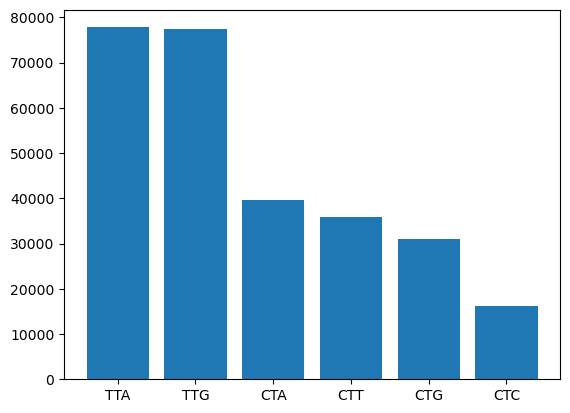

In [95]:
most_freq = amino_count[0][0]
prev = amino_count[0][1]
print(f'Most frequent amino acid is {most_freq} with prevalence of {prev}.')

print(f'It is coded by the following triplets.')
all_triplets = extract_triplets(whole_sequence)
triplets = list()
for tri, count in Counter(all_triplets).items():
    if triplet_to_aminoacid[tri] == most_freq:
        print(f'{tri} ({count} times)')
        triplets.append((tri, count))

triplets.sort(key=lambda x: x[1], reverse=True)
plt.bar([triplet for (triplet, count) in triplets], [count for (triplet, count) in triplets])
plt.show()




##  Problem 1d

Looking at the codon frequencies for randomly selected genes in the Figure 1 of ["JB Plotkin, G Kudla: Synonymous but not the same: the causes and consequences of codon bias"](https://www.nature.com/articles/nrg2899) for yeast (*S. cerevisiae*), select some codons that show a clear bias. Then, like in problem 1C, investigate the triplet barcharts of the amino-acid that is coded by your chosen codons. Can you see the same bias in the codon frequencies that code that amino-acid at the whole genome level of yeast?

Amino acid R
AGA: 47.56% (RSCU 2.85)
CGT: 14.12% (RSCU 0.85)
AGG: 21.31% (RSCU 1.28)
CGA: 6.99% (RSCU 0.42)
CGC: 5.92% (RSCU 0.36)
CGG: 4.10% (RSCU 0.25)


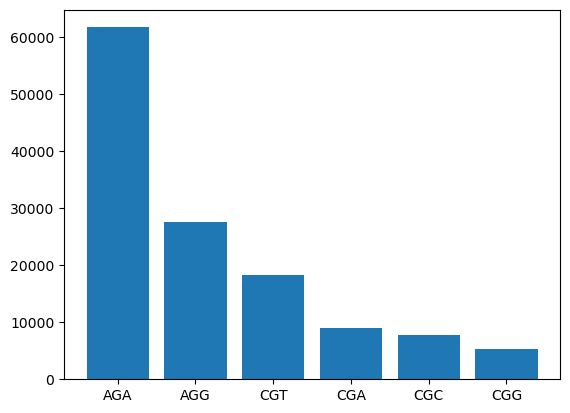

Amino acid L
CTG: 11.19% (RSCU 0.67)
CTC: 5.81% (RSCU 0.35)
TTG: 27.86% (RSCU 1.67)
CTT: 12.91% (RSCU 0.77)
CTA: 14.23% (RSCU 0.85)
TTA: 27.99% (RSCU 1.68)


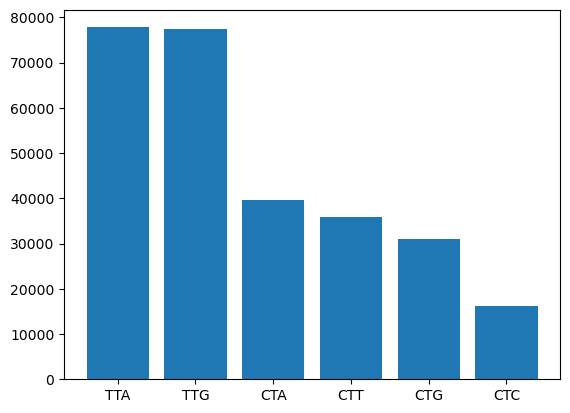

Amino acid E
GAA: 70.11% (RSCU 1.40)
GAG: 29.89% (RSCU 0.60)


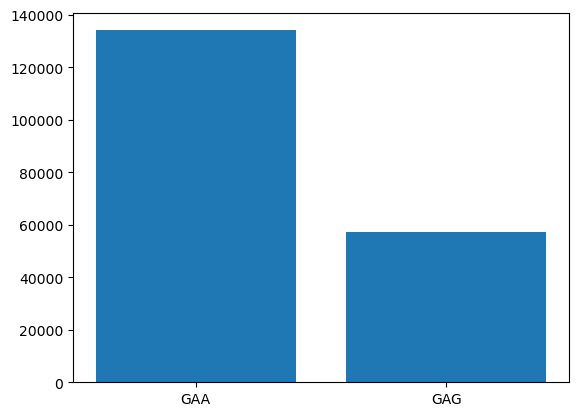

Amino acid P
CCT: 31.10% (RSCU 1.24)
CCC: 15.78% (RSCU 0.63)
CCA: 40.75% (RSCU 1.63)
CCG: 12.38% (RSCU 0.50)


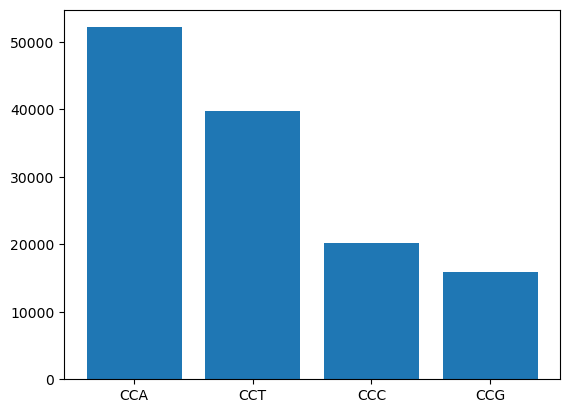

In [96]:
biased = ['AGA', 'CTC', 'GAG', 'CCG'] # U replaced by T
b_aminos = {triplet_to_aminoacid[b]: list() for b in biased}

amino_triplet_dict = dict()
for tri, count in Counter(all_triplets).items():
    amino = triplet_to_aminoacid[tri]
    if amino not in amino_triplet_dict:
        amino_triplet_dict[amino] = list()
    amino_triplet_dict[amino].append((tri, count))

for ba in b_aminos:
    print(f'Amino acid {ba}')

    triplets = amino_triplet_dict[ba]
    total = sum([count for (tri, count) in triplets])
    exp_freq = total / len(triplets)

    for (tri, count) in triplets:
        rscu = count/exp_freq
        print(f'{tri}: {count/total*100:.2f}% (RSCU {rscu:.2f})')
    
    triplets.sort(key=lambda x: x[1], reverse=True)
    plt.bar([t for t, c in triplets], [c for t, c in triplets])
    plt.show()

## The bias in the sequence

The figure showed brighter than average red in AGA and darker than average in CUC, GAG and CCG. The amino acids corresponding the triplets were R, L, E, and P, repectively.

Calculating the percentages and RSCU values for all the triplets coding those amino acids, as well as plotting the frequencies in a bar plot, we find that there seems to be some bias among all of them. The most blatant example seems to be AGA with RSCU value 2.85, occurring over almost three times as often as it should.

##  Problem 2: Binding energy statistics in the yeast genome (intergenic regions) 

Here we analyse signatures of selection from genomic data using transcription factor binding sites as an example. See e.g. ["Kinney JB, Tkacik G, Callan CG (2007) Precise physical models of protein-DNA interaction from high-throughput data. Proc Natl Acad Sci USA 104(2):501–506"](http://www.pnas.org/content/104/2/501.short) and ["Mustonen V, Kinney J, Callan CG, Lässig M (2008) Energy-dependent fitness: a quantitative model for the evolution of yeast transcription factor binding sites. Proc Natl Acad Sci USA 105(34):12376–12381"](http://www.pnas.org/content/105/34/12376.short). 

Directory `data/` contains a file `alignment.txt.NaN.removed` where intergenic sequences for four yeast species (*S.cer, S.par, S.mik, S.bay*) are given. Note we have removed insertions and deletions from the alignment so that analyses which in this assignment focus on a single species aspects are a bit simpler.

In [97]:
from setup import *
%matplotlib inline

In [98]:
# Import data to a dataframe
datafile = "data/alignment.txt.NaN.removed";
seq_igs = pd.read_csv(datafile, sep="\s+");
tfBindingFile = "data/Emat.abf1.kinney";
# Imports an energy matrix modelling transcription factor to DNA binding for factor Abf1
# The dimensions are 4 x 20, correspoding to the four nucleotides A, C, G, T and the binding sites motif length 20
Emat = np.array(pd.read_csv(tfBindingFile, header=None, sep="\s+"))

In [99]:
def getEnergy(seq, Emat):
    s1 = list(seq.replace('A', '0').replace('C', '1').replace('G', '2').replace('T', '3').replace('N', '4'))
    Lmat = Emat.shape[1]
    Lseq = len(s1)
    Ev = []
    for i in range(0, Lseq-Lmat+1):
        E = 0.0;
        k = 0;
        flag = 0;
        eps = 0.0;
        for j in range(i, i+Lmat):
            nuc = int(s1[j])
            if nuc < 4:
                eps = Emat[nuc, k];
            else:
                # Remove sequences with missing data
                flag = 1;
            E += eps
            k += 1;
        if flag == 0:    
            Ev.append(E)
    return Ev

In [100]:
def randomise(seq):
    s1 = list(seq.replace('A', '0').replace('C', '1').replace('G', '2').replace('T', '3').replace('N', '4'))
    random.shuffle(s1)
    return "".join(s1)

#### Problem 2a: 
Visualise the binding energy matrix *Emat* with elements $\epsilon_k(a)$ where $k$ denotes column (binding site position) and $a \in{A,C,G,T}$ nucleotides. Use a heatmap for visualisation (e.g., [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)).

What is the best possible binding sequence according to this model? 

**Hint:** Smaller energy values indicate better binding.

The minimum energy sequence is AATGTCACTTTGTACGACGC


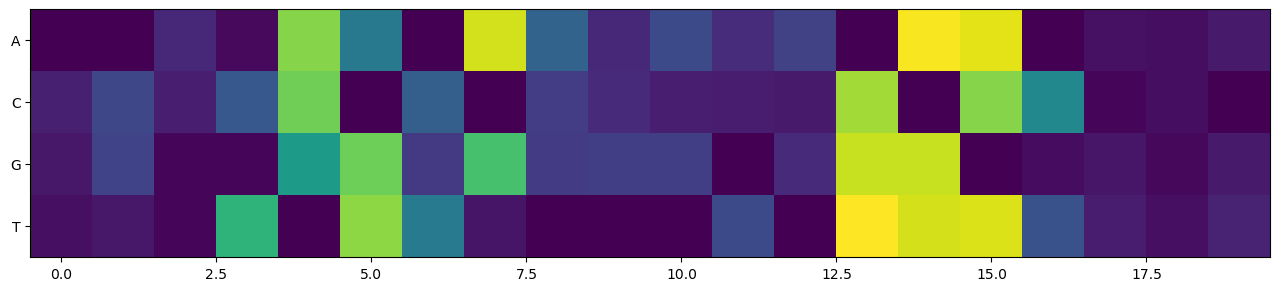

In [101]:
_, axes = plt.subplots(figsize = (16, 10))
axes.imshow(Emat)
axes.set_yticks([0, 1, 2, 3], ['A', 'C', 'G', 'T'])

min_seq=[]
for element in Emat.T:
    min_seq.append(list(element).index(min(element)))

translation = {0:'A', 1:'C', 2:'G', 3:'T'}
for i in range(20):
    min_seq[i] = translation[min_seq[i]]
minimumenergysequence=''.join(min_seq)

print(f'The minimum energy sequence is {minimumenergysequence}')
    

#### Problem 2b:

Explain what the functions `getEnergy()` and `randomise()` do, and add some comments to the code to help a reader understand how they work.

In [102]:
# Using a defined energy matrix, the function getEnergy calculates the energy of subsequences of the given sequence

def getEnergy(seq, Emat):
    # convert the sequence into integer values according to base (4 = missing)
    s1 = list(seq.replace('A', '0').replace('C', '1').replace('G', '2').replace('T', '3').replace('N', '4'))

    Lmat = Emat.shape[1] # number of columns in the energy matrix
    Lseq = len(s1) # length of given sequence
    Ev = [] # initialize list to store energy values

    # loop over all subsequences of length Lmat in the equence
    for i in range(0, Lseq-Lmat+1):
        # initialize values
        E = 0.0 # energy
        k = 0 # position
        flag = 0 # indication of invalid nucleotides
        eps = 0.0 # temporary energy variable

        # loop over the subsequence (length Lmat) nucleotide by nucleotide
        for j in range(i, i+Lmat):
            nuc = int(s1[j]) # current nucleotide

            if nuc < 4: # check that the nucleotide is not ivalid (4)
                eps = Emat[nuc, k] # store the enrgy value
            else:
                # remove sequences with missing data
                flag = 1

            E += eps # add the temporary value to the energy value
            k += 1 # move to next position

        # add if the whole subsequence is valid
        if flag == 0:    
            Ev.append(E)
            
    return Ev


# The randomise function initializes the sequence for energy calculating by numerizing the bases and then randomizes the order of them

def randomise(seq):
    # convert the sequence into integer values according to base (4 = missing)
    s1 = list(seq.replace('A', '0').replace('C', '1').replace('G', '2').replace('T', '3').replace('N', '4'))
    random.shuffle(s1) # the list is shuffled into a random order
    return "".join(s1) # sequence is joined back together before returning

#### Problem 2c: 
Now, run the cell below (takes ~1 minute) and put a comment on each line to explain what it does. Plot a histogram of EvAll (use logarithmic y-axis and increase the number of bins, e.g., to 100).

In [103]:
Nigs = seq_igs.shape[0] # number of rows in seq_igs
Eigs = [] # intialize empty list to store energy values
# loop over the rows in seq_igs
for n in range(0, Nigs):
    seq = seq_igs['Scer'][n] # get the sequence of 'Scer' from the row in question (n)
    Eigs.append(getEnergy(seq, Emat)) # calculate energy of the sequence and add to the energy values array
    
EvAll = [val for sublist in Eigs for val in sublist] # merge list of lists in to a one big list containing all the energy values

array([[<Axes: title={'center': '0'}>]], dtype=object)

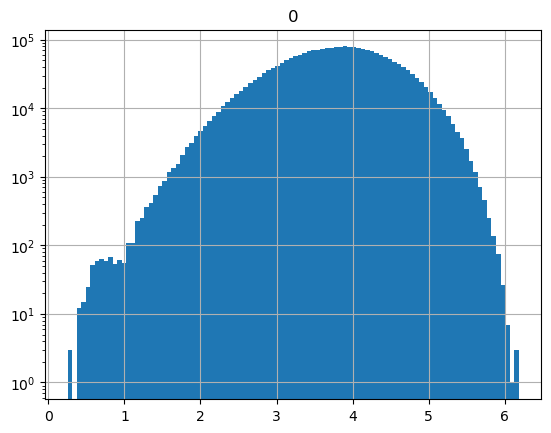

In [104]:
pd.DataFrame(EvAll).hist(bins=100, log=True)

#### Problem 2d: 
In fact, the histogram (2c) does not show all the possible binding sites in intergenic regions because the given sequences represent only the leading strand of DNA. To get the missing half, you can either make a second data set by reverse complementing all intergenic sequence or by reverse complementing the energy matrix (apply that to a new energy matrix by copy-pasting the code from 2c and modifying it as needed; hint: np.fliplr() and np.flipud might be useful). Make a histogram as in 2c but now for all data.

array([[<Axes: title={'center': '0'}>]], dtype=object)

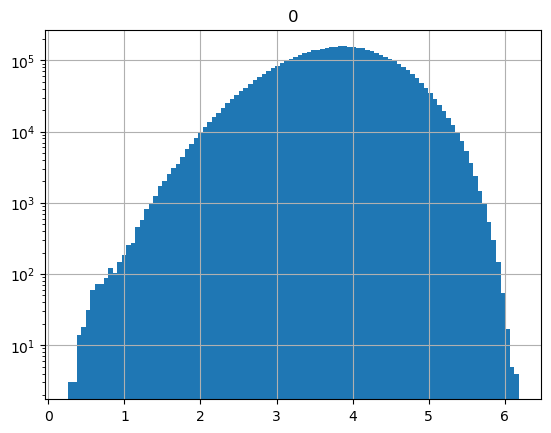

In [105]:
def flip(sequence):
    flip_dict = {'A':'T', 'T':'A', 'G':'C','C':'G'}
    flipped = list()
    for base in sequence:
        flipped.append(flip_dict[base])
    return ''.join(flipped)

Eigs_flips = list()
for n in range(0, Nigs):
    seq = flip(seq_igs['Scer'][n])
    Eigs_flips.append(getEnergy(seq, Emat))
EvAll_flip = [val for sublist in Eigs_flips for val in sublist]
EvAll = EvAll + EvAll_flip

pd.DataFrame(EvAll).hist(bins=100, log=True)

#### Problem 2e: 
Make a null model by permuting randomly each intergenic sequence using the function `randomise()` (i.e., copy the code from 2d and add one line with `randomise()`, before using `getEnergy()`). Plot the counts from the null model together with the real data into a histogram. Comment on what you see. Where is selection visible?


array([[<Axes: title={'center': '0'}>]], dtype=object)

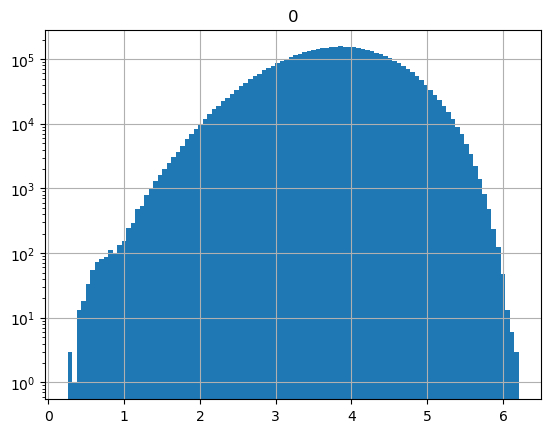

In [108]:
Eigs_flips = list()
for n in range(0, Nigs):
    seq = randomise(flip(seq_igs['Scer'][n]))
    Eigs_flips.append(getEnergy(seq, Emat))
    
EvAll = [val for sublist in Eigs for val in sublist]
EvAll_flip = [val for sublist in Eigs_flips for val in sublist]
EvAll = EvAll + EvAll_flip

pd.DataFrame(EvAll).hist(bins=100, log=True)

## Comparing the randomized and to the actual histogram

Overall the actual histogram seems quite uniform but in smaller energy values there are slightly more represaentation than the randomized data would suggest.

Well okay now that I run it again, it looks really similar to the actual data. Maybe I screwed something up.